# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('demo01.csv')
data.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [64]:
#As variáveis
#Tipos de dados de cada variável

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [65]:
#Quantidade de missings
data.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

mau
False    16260
True       390
Name: count, dtype: int64


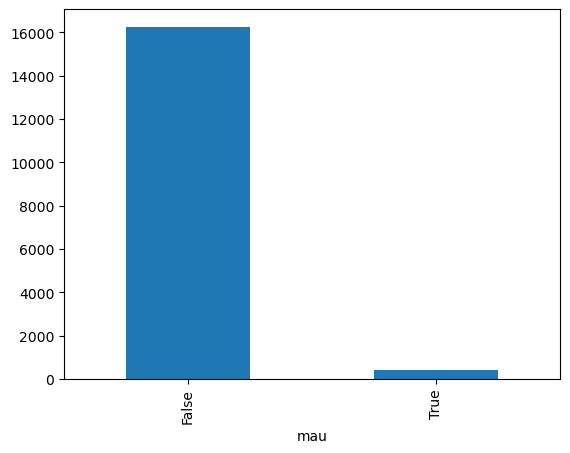

In [66]:
#Distribuição da variável resposta (mau)
tabela_mau = data['mau'].value_counts()
print(tabela_mau)

tabela_mau.plot(kind='bar')
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [67]:
#1)
data_tipo = pd.DataFrame(data.dtypes, index = data.columns, columns = ['tipo'])

data_tipo

,tipo
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau 

In [69]:
data.reset_index(drop =True, inplace = True)
data.index

RangeIndex(start=0, stop=6770, step=1)

In [70]:
data['sexo'].unique()

array(['M', 'F'], dtype=object)

In [71]:
data['posse_de_veiculo'].unique()

array(['Y', 'N'], dtype=object)

In [72]:
data['posse_de_imovel'].unique()

array(['Y', 'N'], dtype=object)

In [73]:
data['tipo_renda'].unique()

array(['Working', 'Commercial associate', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [74]:
data['educacao'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [75]:
data['estado_civil'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [76]:
data['tipo_residencia'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [77]:
#2)
data_tipo = pd.DataFrame(data.dtypes, index = data.columns, columns = ['tipo'])
data_tipo['qtd_categorias'] = data.apply(lambda x: len(x.unique()))
data_tipo

,tipo,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [88]:
data_tipo = pd.DataFrame(data.dtypes, columns = ['tipo'])
data_tipo['qtd_categorias'] = data.apply(lambda x: len(x.unique()))
data_tipo

,tipo,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [90]:
data_tipo_1 = pd.DataFrame(data.dtypes, columns = ['tipo'])

qntd_cat = []

for i in data_tipo_1.index:
    soma_var = len(data[i].unique())
    qntd_cat.append(soma_var)

data_tipo_1['qtd_categorias'] = qntd_cat
data_tipo_1

,tipo,qtd_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [91]:
data['sexo'] = data['sexo'].map({"M":0, "F":1})

In [92]:
data['posse_de_veiculo'] = data['posse_de_veiculo'].map({"Y":0, "N":1})

In [93]:
data['posse_de_imovel'] = data['posse_de_imovel'].map({"Y":0, "N":1})

In [94]:
data = pd.get_dummies(data, columns = ['tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first = True)
data

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,0,0,58.832877,3.106849,1,0,0,0,...,True,True,False,False,False,True,False,False,False,False
1,1,1,0,0,52.356164,8.358904,1,0,1,1,...,True,False,False,True,False,True,False,False,False,False
2,0,0,0,0,46.224658,2.106849,1,1,1,1,...,False,True,False,False,False,True,False,False,False,False
3,1,0,1,0,29.230137,3.021918,1,0,0,0,...,False,True,False,False,False,True,False,False,False,False
4,1,1,0,0,27.482192,4.024658,1,0,1,0,...,True,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,1,0,1,34.857534,3.101370,1,1,1,0,...,True,False,False,True,False,True,False,False,False,False
6766,1,1,0,0,54.109589,9.884932,1,0,0,0,...,True,False,False,False,False,True,False,False,False,False
6767,1,1,0,0,43.389041,7.380822,1,1,1,0,...,True,True,False,False,False,True,False,False,False,False
6768,0,0,0,0,30.005479,9.800000,1,1,0,0,...,True,True,False,False,False,True,False,False,False,False


In [100]:
data.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau',
       'soma_linha', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [95]:
tabela_cruzada = pd.crosstab(data['possui_email'], data['posse_de_veiculo'])
tabela_cruzada

posse_de_veiculo,0,1
possui_email,,
0,2327,3878
1,232,333


In [96]:
tabela_cruzada_email = pd.crosstab(data['possui_email'], data['mau'])
tabela_cruzada_email

mau,False,True
possui_email,,
0,5927,278
1,545,20


In [97]:
tabela_cruzada_veiculo = pd.crosstab(data['posse_de_veiculo'], data['mau'])
tabela_cruzada_veiculo

mau,False,True
posse_de_veiculo,,
0,2451,108
1,4021,190


Analisando a relação entre possui email e mau com possui veiculo e mau, percebe-se que o número de pessoas que possuem veiculo e são classificadas com mau pagador e bem maior que o número de pessoas que possuiem email e são classificadas como mau pagador. Logo, a variavél possui veiculo é mais apropriada para se prever um mau pagador.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [98]:
data.to_csv('data.csv', index=False)